I decided to explore further to determine the country with the most releases, as well as the genres being released from that country.

![](img-1.jpg)

In [70]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt


In [71]:

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")
print(netflix_df.shape)
netflix_df.head()

(7787, 11)


,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [72]:
netflix_df.type.unique()

array(['TV Show', 'Movie'], dtype=object)

In [73]:
top_10_countries = netflix_df.groupby("country").size().sort_values()[-10:].index

In [74]:
netflix_df_top_countries_releasing = netflix_df[netflix_df.country.isin(top_10_countries)]

In [75]:

# Select only the columns of interest
netflix_subset = netflix_df_top_countries_releasing[["title", "country", "genre", "release_year", "duration"]]
netflix_subset.head()


,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
7,187,United States,Dramas,1997,119
8,706,India,Horror Movies,2019,118


In [76]:
netflix_subset.country.value_counts()

United States     2883
India              956
United Kingdom     577
Canada             259
Japan              237
France             196
South Korea        194
Spain              168
Mexico             123
Australia          108
Name: country, dtype: int64

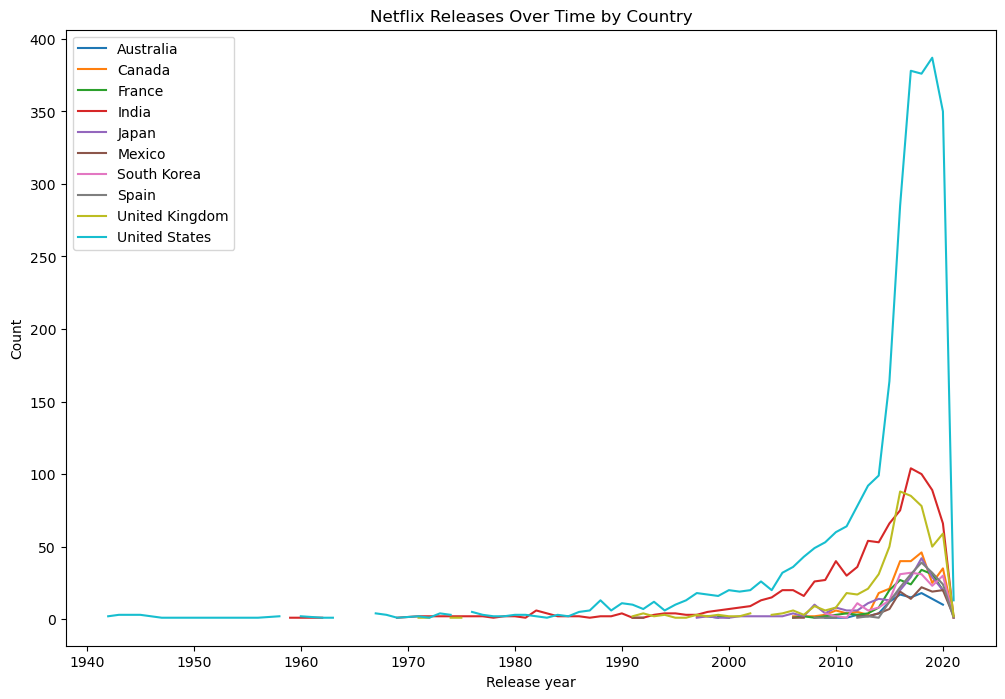

In [100]:
# Set the figure style and initalize a new figure
fig = plt.figure(figsize=(12,8))

netflix_grouped = netflix_subset.groupby(["country", "release_year"])["release_year"].count().unstack().T

plt.plot(netflix_grouped.index, netflix_grouped.values, label = netflix_grouped.columns)

# Create a title and axis labels
plt.title("Netflix Releases Over Time by Country")
plt.xlabel("Release year")
plt.ylabel("Count")

plt.legend();

### Let's delve deeper and explore the plethora of genres that emerge from the United States over time.


In [ ]:

netflix_usa = netflix_subset[netflix_subset["country"].isin(["United States"])]

In [98]:
netflix_usa.groupby("genre").size().sort_values(ascending = False)[:12]

genre
Documentaries    397
Dramas           377
Comedies         328
Children         290
Action           245
Stand-Up         238
Kids             163
Docuseries       118
Crime TV         112
Horror Movies    111
TV Comedies      100
Reality TV        80
dtype: int64

In [96]:
genre_colors_dict = {
    "Documentaries": "red",
    "Dramas": "blue",
    "Comedies": "green",
    "Children": "darkorange",
    "Action": "yellow",
    "Stand-Up": "lime",
    "Kids": "aqua",
    "Docuseries": "violet",
    "Crime TV": "royalblue",
    "Horror Movies": "gold",
    "Horror Movies": "bisque",
    "Others": "black"
}

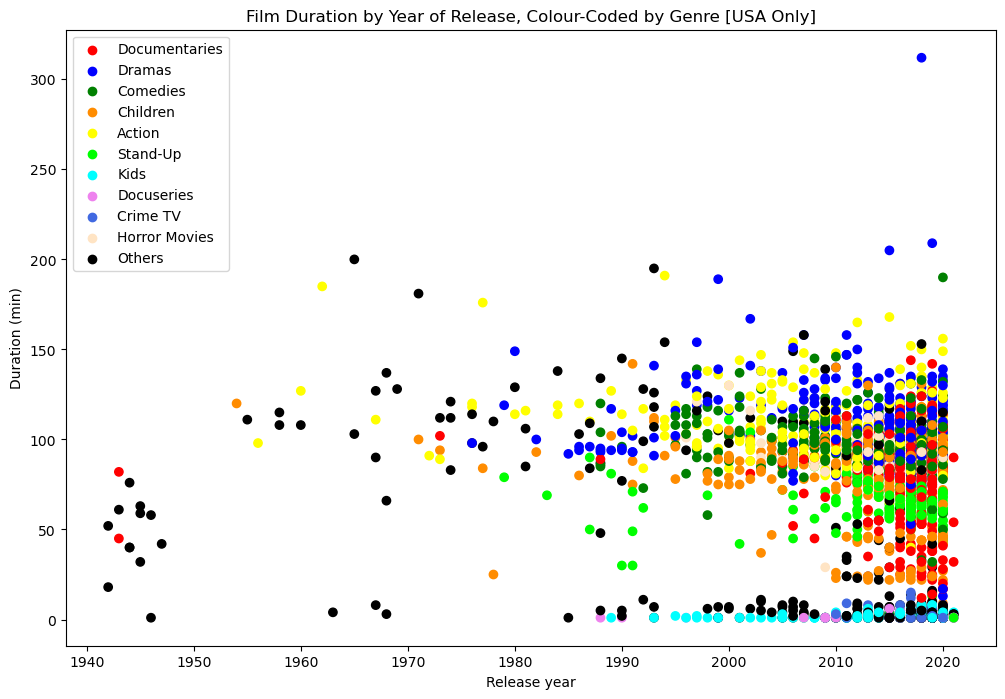

In [99]:
# Set the figure style and initalize a new figure
fig = plt.figure(figsize=(12,8))

# Create a list of colors for each data point based on genre
colors = [genre_colors_dict[genre] if genre in genre_colors_dict else "black" for genre in netflix_usa.genre]

# Plot the scatter plot with the specified colors
plt.scatter(netflix_usa.release_year, netflix_usa.duration, c=colors)

# Add legend based on genre_colors_dict
for genre, color in genre_colors_dict.items():
    plt.scatter([], [], c=color, label=genre)  # Empty scatter plot for each genre

# Create a title and axis labels
plt.title("Film Duration by Year of Release, Colour-Coded by Genre [USA Only]")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")

# Show legend
plt.legend()

# Show the plot
plt.show()

For the past 20 years, it has been dramas, stand-up, action and in recent times, we see more documentaries.

Another observation, it seems as though in 2010, USA started producting less comedies and more stand ups